In [1]:
import keras
import numpy as np
from numpy import array
from numpy import hstack
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
	
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
rawdata = pd.read_csv('Rawdata.csv')

In [3]:
rawdata.head()

,Date,PM10,PM25
0,2018040100,35.900000,18.450000
1,2018040101,37.883333,19.266667
2,2018040102,38.700000,19.150000
3,2018040103,40.116667,20.050000
4,2018040104,44.516667,22.966667


In [4]:
raw2 = rawdata.drop('Date', axis=1)

In [5]:
in_seq1 = array(raw2["PM10"])
in_seq2 = array(raw2["PM25"])

In [6]:
in_seq1

array([ 35.9       ,  37.88333333,  38.7       , ..., 116.6833333 ,
        96.9       ,  98.31666667])

In [7]:
np.random.seed(902)

In [8]:
n_steps = 5
n_features = 1

#  


In [9]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [10]:
x_pm10, y_pm10 = split_sequence(in_seq1, n_steps)

print(x_pm10.shape, y_pm10.shape)

(5467, 5) (5467,)


In [11]:
x_pm25, y_pm25 = split_sequence(in_seq2, n_steps)

print(x_pm25.shape, y_pm25.shape)

(5467, 5) (5467,)


In [12]:
x_pm10

array([[ 35.9       ,  37.88333333,  38.7       ,  40.11666667,
         44.51666667],
       [ 37.88333333,  38.7       ,  40.11666667,  44.51666667,
         57.33333333],
       [ 38.7       ,  40.11666667,  44.51666667,  57.33333333,
         53.38333333],
       ...,
       [ 83.25      ,  87.56666667,  97.        ,  92.95      ,
        101.85      ],
       [ 87.56666667,  97.        ,  92.95      , 101.85      ,
        116.6833333 ],
       [ 97.        ,  92.95      , 101.85      , 116.6833333 ,
         96.9       ]])

In [13]:
x_pm10 = x_pm10.reshape((x_pm10.shape[0], x_pm10.shape[1], n_features))
x_pm25 = x_pm25.reshape((x_pm25.shape[0], x_pm25.shape[1], n_features))

In [14]:
x_pm10

array([[[ 35.9       ],
        [ 37.88333333],
        [ 38.7       ],
        [ 40.11666667],
        [ 44.51666667]],

       [[ 37.88333333],
        [ 38.7       ],
        [ 40.11666667],
        [ 44.51666667],
        [ 57.33333333]],

       [[ 38.7       ],
        [ 40.11666667],
        [ 44.51666667],
        [ 57.33333333],
        [ 53.38333333]],

       ...,

       [[ 83.25      ],
        [ 87.56666667],
        [ 97.        ],
        [ 92.95      ],
        [101.85      ]],

       [[ 87.56666667],
        [ 97.        ],
        [ 92.95      ],
        [101.85      ],
        [116.6833333 ]],

       [[ 97.        ],
        [ 92.95      ],
        [101.85      ],
        [116.6833333 ],
        [ 96.9       ]]])

In [15]:
y_pm10

array([ 57.33333333,  53.38333333,  55.46666667, ..., 116.6833333 ,
        96.9       ,  98.31666667])

#  

In [16]:
model = Sequential()
model.add(LSTM(340, activation='relu', return_sequences=True, input_shape=(n_steps,n_features)))
model.add(LSTM(340, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

hist = model.fit(x_pm10, y_pm10, epochs=2**10, batch_size=2**10)

Epoch 1/1024
5467/5467 [==============================] - 5s 900us/step - loss: 1113.9502
Epoch 2/1024
5467/5467 [==============================] - 3s 626us/step - loss: 295.7039
Epoch 3/1024
5467/5467 [==============================] - 3s 627us/step - loss: 225.0504
Epoch 4/1024
5467/5467 [==============================] - 3s 627us/step - loss: 182.5314
Epoch 5/1024
5467/5467 [==============================] - 3s 622us/step - loss: 152.3690
Epoch 6/1024
5467/5467 [==============================] - 3s 628us/step - loss: 120.1751
Epoch 7/1024
5467/5467 [==============================] - 3s 628us/step - loss: 92.3592
Epoch 8/1024
5467/5467 [==============================] - 3s 631us/step - loss: 81.5607
Epoch 9/1024
5467/5467 [==============================] - 3s 625us/step - loss: 70.4239
Epoch 10/1024
5467/5467 [==============================] - 3s 625us/step - loss: 79.8855
Epoch 11/1024
5467/5467 [==============================] - 3s 625us/step - loss: 73.8603
Epoch 12/1024
5467/5467

5467/5467 [==============================] - 3s 625us/step - loss: 41.6390
Epoch 94/1024
5467/5467 [==============================] - 3s 625us/step - loss: 40.7311
Epoch 95/1024
5467/5467 [==============================] - 3s 625us/step - loss: 40.6225
Epoch 96/1024
5467/5467 [==============================] - 3s 625us/step - loss: 39.7793
Epoch 97/1024
5467/5467 [==============================] - 4s 640us/step - loss: 39.3091
Epoch 98/1024
5467/5467 [==============================] - 3s 628us/step - loss: 39.6521
Epoch 99/1024
5467/5467 [==============================] - 4s 640us/step - loss: 39.8000
Epoch 100/1024
5467/5467 [==============================] - 3s 636us/step - loss: 41.6919
Epoch 101/1024
5467/5467 [==============================] - 3s 625us/step - loss: 41.5013
Epoch 102/1024
5467/5467 [==============================] - 3s 629us/step - loss: 41.7361
Epoch 103/1024
5467/5467 [==============================] - 3s 626us/step - loss: 41.9130
Epoch 104/1024
5467/5467 [=====

5467/5467 [==============================] - 3s 627us/step - loss: 35.7398
Epoch 185/1024
5467/5467 [==============================] - 3s 625us/step - loss: 36.6614
Epoch 186/1024
5467/5467 [==============================] - 3s 624us/step - loss: 39.7702
Epoch 187/1024
5467/5467 [==============================] - 3s 628us/step - loss: 38.0924
Epoch 188/1024
5467/5467 [==============================] - 3s 625us/step - loss: 36.4266
Epoch 189/1024
5467/5467 [==============================] - 3s 628us/step - loss: 34.3479
Epoch 190/1024
5467/5467 [==============================] - 3s 627us/step - loss: 33.9096
Epoch 191/1024
5467/5467 [==============================] - 3s 627us/step - loss: 33.8402
Epoch 192/1024
5467/5467 [==============================] - 3s 625us/step - loss: 34.1277
Epoch 193/1024
5467/5467 [==============================] - 3s 627us/step - loss: 33.7636
Epoch 194/1024
5467/5467 [==============================] - 3s 626us/step - loss: 33.2132
Epoch 195/1024
5467/5467 

5467/5467 [==============================] - 3s 633us/step - loss: 43.1522
Epoch 276/1024
5467/5467 [==============================] - 3s 625us/step - loss: 45.0348
Epoch 277/1024
5467/5467 [==============================] - 3s 628us/step - loss: 45.1371
Epoch 278/1024
5467/5467 [==============================] - 3s 628us/step - loss: 40.7785
Epoch 279/1024
5467/5467 [==============================] - 3s 628us/step - loss: 39.8454
Epoch 280/1024
5467/5467 [==============================] - 3s 625us/step - loss: 38.8420
Epoch 281/1024
5467/5467 [==============================] - 3s 625us/step - loss: 38.4058
Epoch 282/1024
5467/5467 [==============================] - 3s 628us/step - loss: 39.1587
Epoch 283/1024
5467/5467 [==============================] - 3s 625us/step - loss: 41.9277
Epoch 284/1024
5467/5467 [==============================] - 3s 627us/step - loss: 44.3346
Epoch 285/1024
5467/5467 [==============================] - 3s 628us/step - loss: 41.7894
Epoch 286/1024
5467/5467 

5467/5467 [==============================] - 3s 633us/step - loss: 30.2487
Epoch 367/1024
5467/5467 [==============================] - 3s 626us/step - loss: 30.1278
Epoch 368/1024
5467/5467 [==============================] - 3s 623us/step - loss: 30.2112
Epoch 369/1024
5467/5467 [==============================] - 3s 626us/step - loss: 30.1377
Epoch 370/1024
5467/5467 [==============================] - 3s 627us/step - loss: 29.4583
Epoch 371/1024
5467/5467 [==============================] - 3s 625us/step - loss: 31.2325
Epoch 372/1024
5467/5467 [==============================] - 3s 625us/step - loss: 30.5688
Epoch 373/1024
5467/5467 [==============================] - 3s 626us/step - loss: 31.9458
Epoch 374/1024
5467/5467 [==============================] - 3s 640us/step - loss: 30.1258
Epoch 375/1024
5467/5467 [==============================] - 4s 662us/step - loss: 30.0893
Epoch 376/1024
5467/5467 [==============================] - 4s 650us/step - loss: 29.9294
Epoch 377/1024
5467/5467 

5467/5467 [==============================] - 3s 631us/step - loss: 26.9151
Epoch 458/1024
5467/5467 [==============================] - 3s 634us/step - loss: 26.9702
Epoch 459/1024
5467/5467 [==============================] - 3s 628us/step - loss: 27.1641
Epoch 460/1024
5467/5467 [==============================] - 3s 628us/step - loss: 27.8694
Epoch 461/1024
5467/5467 [==============================] - 3s 628us/step - loss: 27.7341
Epoch 462/1024
5467/5467 [==============================] - 3s 634us/step - loss: 26.3109
Epoch 463/1024
5467/5467 [==============================] - 4s 654us/step - loss: 25.8283
Epoch 464/1024
5467/5467 [==============================] - 3s 637us/step - loss: 25.3202
Epoch 465/1024
5467/5467 [==============================] - 3s 634us/step - loss: 26.1583
Epoch 466/1024
5467/5467 [==============================] - 3s 631us/step - loss: 25.7110
Epoch 467/1024
5467/5467 [==============================] - 3s 637us/step - loss: 25.6662
Epoch 468/1024
5467/5467 

5467/5467 [==============================] - 3s 637us/step - loss: 24.6351
Epoch 549/1024
5467/5467 [==============================] - 3s 631us/step - loss: 24.2765
Epoch 550/1024
5467/5467 [==============================] - 4s 644us/step - loss: 24.7277
Epoch 551/1024
5467/5467 [==============================] - 4s 663us/step - loss: 26.4590
Epoch 552/1024
5467/5467 [==============================] - 4s 646us/step - loss: 26.9604
Epoch 553/1024
5467/5467 [==============================] - 4s 649us/step - loss: 25.2249
Epoch 554/1024
5467/5467 [==============================] - 3s 640us/step - loss: 25.2054
Epoch 555/1024
5467/5467 [==============================] - 3s 628us/step - loss: 26.0258
Epoch 556/1024
5467/5467 [==============================] - 3s 628us/step - loss: 26.8035
Epoch 557/1024
5467/5467 [==============================] - 3s 628us/step - loss: 26.1954
Epoch 558/1024
5467/5467 [==============================] - 3s 625us/step - loss: 26.2579
Epoch 559/1024
5467/5467 

5467/5467 [==============================] - 3s 631us/step - loss: 15.8052
Epoch 640/1024
5467/5467 [==============================] - 3s 628us/step - loss: 16.6479
Epoch 641/1024
5467/5467 [==============================] - 3s 628us/step - loss: 19.3094
Epoch 642/1024
5467/5467 [==============================] - 3s 628us/step - loss: 18.8787
Epoch 643/1024
5467/5467 [==============================] - 3s 627us/step - loss: 18.8481
Epoch 644/1024
5467/5467 [==============================] - 3s 628us/step - loss: 17.7591
Epoch 645/1024
5467/5467 [==============================] - 3s 628us/step - loss: 17.9673
Epoch 646/1024
5467/5467 [==============================] - 3s 625us/step - loss: 17.9002
Epoch 647/1024
5467/5467 [==============================] - 3s 625us/step - loss: 18.0833
Epoch 648/1024
5467/5467 [==============================] - 3s 628us/step - loss: 17.5573
Epoch 649/1024
5467/5467 [==============================] - 3s 631us/step - loss: 17.8420
Epoch 650/1024
5467/5467 

5467/5467 [==============================] - 3s 632us/step - loss: 13.1666
Epoch 731/1024
5467/5467 [==============================] - 3s 629us/step - loss: 13.0195
Epoch 732/1024
5467/5467 [==============================] - 3s 636us/step - loss: 12.9633
Epoch 733/1024
5467/5467 [==============================] - 4s 661us/step - loss: 12.8063
Epoch 734/1024
5467/5467 [==============================] - 4s 647us/step - loss: 13.0819
Epoch 735/1024
5467/5467 [==============================] - 3s 629us/step - loss: 12.6028
Epoch 736/1024
5467/5467 [==============================] - 3s 628us/step - loss: 12.7788
Epoch 737/1024
5467/5467 [==============================] - 3s 627us/step - loss: 13.1146
Epoch 738/1024
5467/5467 [==============================] - 3s 626us/step - loss: 13.0581
Epoch 739/1024
5467/5467 [==============================] - 3s 627us/step - loss: 13.1206
Epoch 740/1024
5467/5467 [==============================] - 3s 623us/step - loss: 14.1378
Epoch 741/1024
5467/5467 

5467/5467 [==============================] - 4s 676us/step - loss: 16.3915
Epoch 822/1024
5467/5467 [==============================] - 3s 640us/step - loss: 16.5196
Epoch 823/1024
5467/5467 [==============================] - 3s 632us/step - loss: 15.9526
Epoch 824/1024
5467/5467 [==============================] - 4s 642us/step - loss: 16.3908
Epoch 825/1024
5467/5467 [==============================] - 3s 635us/step - loss: 16.1313
Epoch 826/1024
5467/5467 [==============================] - 3s 636us/step - loss: 14.6365
Epoch 827/1024
5467/5467 [==============================] - 4s 663us/step - loss: 14.5612
Epoch 828/1024
5467/5467 [==============================] - 4s 667us/step - loss: 13.6692
Epoch 829/1024
5467/5467 [==============================] - 4s 654us/step - loss: 13.2762
Epoch 830/1024
5467/5467 [==============================] - 4s 645us/step - loss: 13.6159
Epoch 831/1024
5467/5467 [==============================] - 3s 627us/step - loss: 13.0928
Epoch 832/1024
5467/5467 

5467/5467 [==============================] - 4s 647us/step - loss: 14.1950
Epoch 913/1024
5467/5467 [==============================] - 4s 641us/step - loss: 13.8138
Epoch 914/1024
5467/5467 [==============================] - 3s 637us/step - loss: 13.4999
Epoch 915/1024
5467/5467 [==============================] - 4s 643us/step - loss: 12.1934
Epoch 916/1024
5467/5467 [==============================] - 4s 704us/step - loss: 11.6761
Epoch 917/1024
5467/5467 [==============================] - 4s 674us/step - loss: 11.0860
Epoch 918/1024
5467/5467 [==============================] - 3s 624us/step - loss: 10.3100
Epoch 919/1024
5467/5467 [==============================] - 3s 631us/step - loss: 10.2523
Epoch 920/1024
5467/5467 [==============================] - 3s 627us/step - loss: 9.6123
Epoch 921/1024
5467/5467 [==============================] - 3s 633us/step - loss: 9.0622
Epoch 922/1024
5467/5467 [==============================] - 4s 678us/step - loss: 9.0533
Epoch 923/1024
5467/5467 [==

5467/5467 [==============================] - 3s 627us/step - loss: 7.6043
Epoch 1004/1024
5467/5467 [==============================] - 3s 625us/step - loss: 7.9343
Epoch 1005/1024
5467/5467 [==============================] - 3s 624us/step - loss: 8.4205
Epoch 1006/1024
5467/5467 [==============================] - 3s 628us/step - loss: 8.2691
Epoch 1007/1024
5467/5467 [==============================] - 3s 628us/step - loss: 7.9287
Epoch 1008/1024
5467/5467 [==============================] - 3s 628us/step - loss: 7.5940
Epoch 1009/1024
5467/5467 [==============================] - 3s 626us/step - loss: 6.9793
Epoch 1010/1024
5467/5467 [==============================] - 3s 626us/step - loss: 6.8991
Epoch 1011/1024
5467/5467 [==============================] - 3s 625us/step - loss: 6.9771
Epoch 1012/1024
5467/5467 [==============================] - 3s 624us/step - loss: 7.0368
Epoch 1013/1024
5467/5467 [==============================] - 3s 625us/step - loss: 6.8002
Epoch 1014/1024
5467/5467 

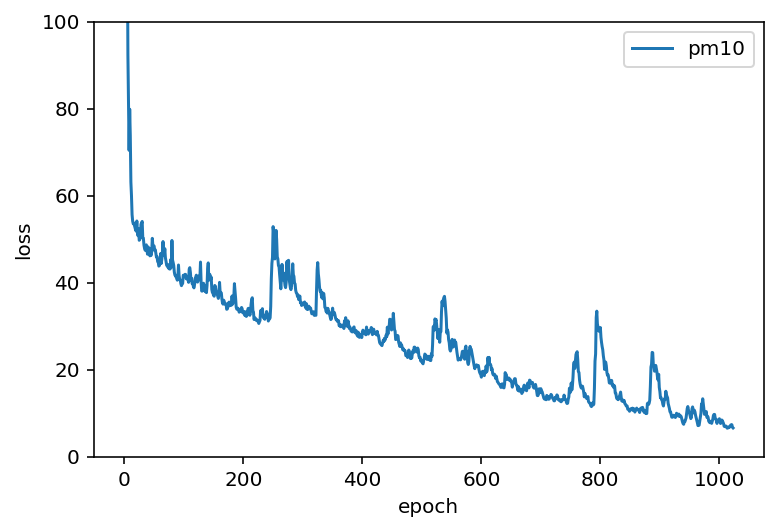

In [17]:
plt.plot(hist.history['loss'])
plt.ylim(0.0, 100.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['pm10'], loc='upper right')
plt.show()

#  

In [41]:
AngelInUs = pd.read_csv('AngelInUs.csv')
GangnamSt = pd.read_csv('GangnamSt.csv')
JL3avenue = pd.read_csv('JL3avenue.csv')
JL4avenue = pd.read_csv('JL4avenue.csv')
JLTower = pd.read_csv('JLTower.csv')
SJRst = pd.read_csv('SJRSt.csv')

In [42]:
AngelInUs2 = AngelInUs.drop(['Date'], axis=1)
GangnamSt2 = GangnamSt.drop(['Date'], axis=1)
JL3avenue2 = JL3avenue.drop(['Date'], axis=1)
JL4avenue2 = JL4avenue.drop(['Date'], axis=1)
JLTower2 = JLTower.drop(['Date'], axis=1)
SJRst2 = SJRst.drop(['Date'], axis=1)

In [43]:
in_seqA = array(AngelInUs2["PM10"])
in_seqG = array(GangnamSt2["PM10"])
in_seqJ3 = array(JL3avenue2["PM10"])
in_seqJ4 = array(JL4avenue2["PM10"])
in_seqJT = array(JLTower2["PM10"])
in_seqS = array(SJRst2["PM10"])

In [44]:
x_Angel, y_Angel = split_sequence(in_seqA, n_steps)
x_Gangnam, y_Gangnam = split_sequence(in_seqG, n_steps)
x_JL3avenue, y_JL3avenue = split_sequence(in_seqJ3, n_steps)
x_JL4avenue, y_JL4avenue = split_sequence(in_seqJ4, n_steps)
x_JLTower, y_JLTower = split_sequence(in_seqJT, n_steps)
x_SJR, y_SJR = split_sequence(in_seqS, n_steps)

In [45]:
x_Angel = x_Angel.reshape((x_Angel.shape[0], x_Angel.shape[1], n_features))
x_Gangnam = x_Gangnam.reshape((x_Gangnam.shape[0], x_Gangnam.shape[1], n_features))
x_JL3avenue = x_JL3avenue.reshape((x_JL3avenue.shape[0], x_JL3avenue.shape[1], n_features))
x_JL4avenue = x_JL4avenue.reshape((x_JL4avenue.shape[0], x_JL4avenue.shape[1], n_features))
x_JLTower = x_JLTower.reshape((x_JLTower.shape[0], x_JLTower.shape[1], n_features))
x_SJR = x_SJR.reshape((x_SJR.shape[0], x_SJR.shape[1], n_features))

In [46]:
yhat_Angel = model.predict(x_Angel)
yhat_Gangnam = model.predict(x_Gangnam)
yhat_JL3avenue = model.predict(x_JL3avenue)
yhat_JL4avenue = model.predict(x_JL4avenue)
yhat_JLTower = model.predict(x_JLTower)
yhat_SJR = model.predict(x_SJR)

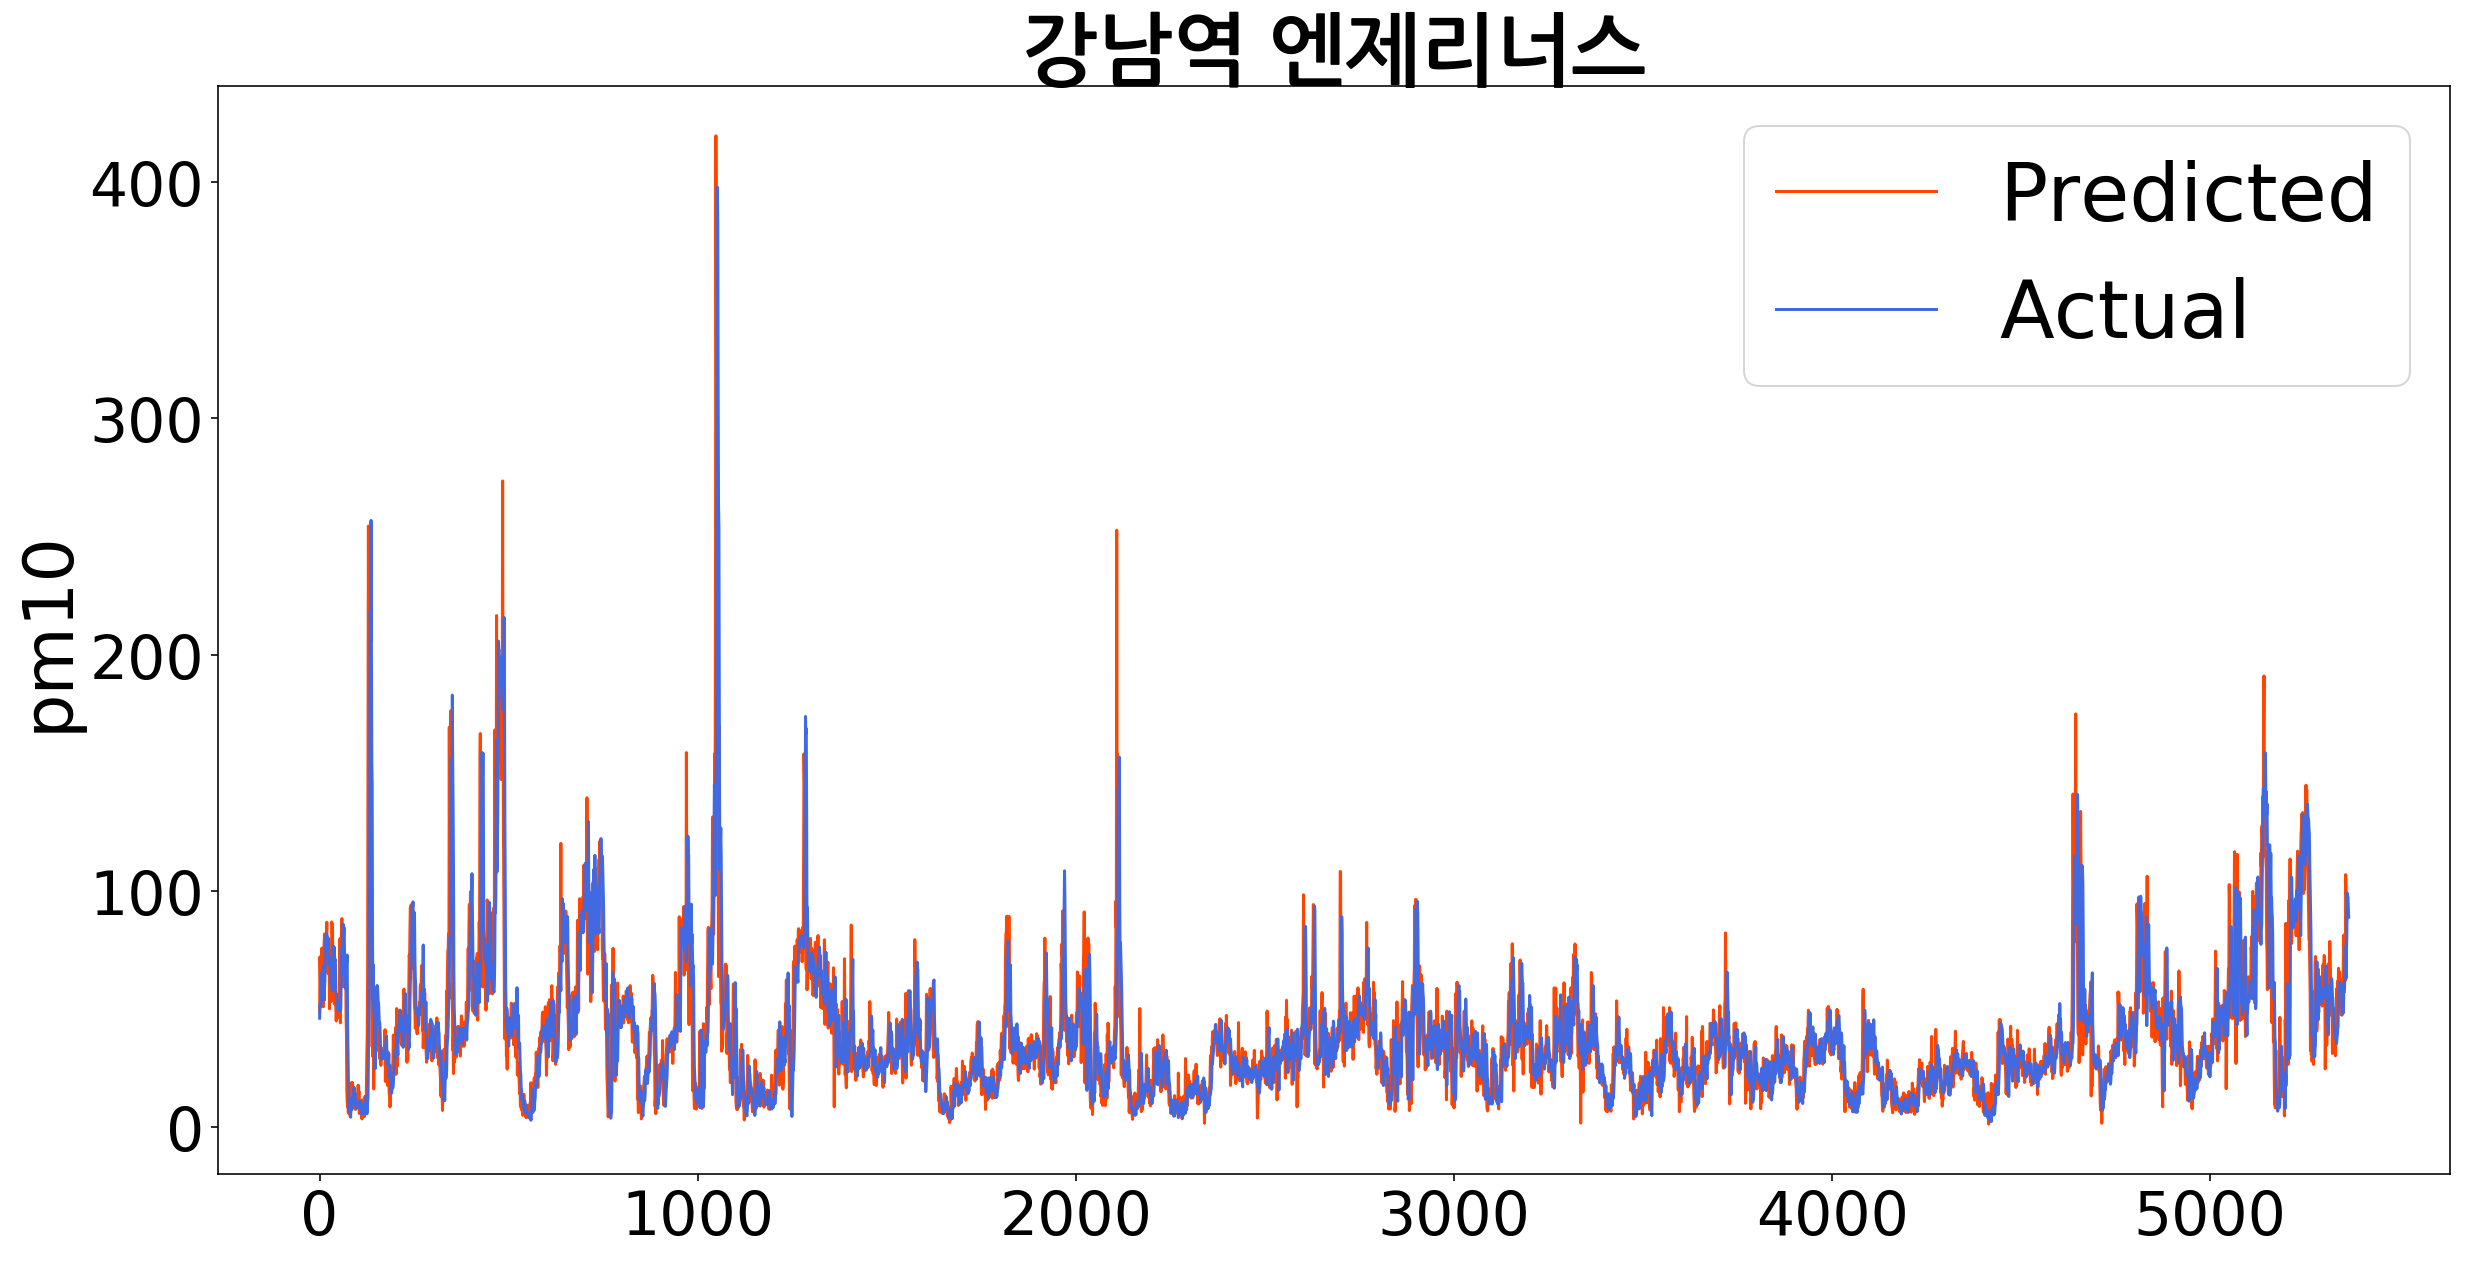

In [54]:
plt.figure(figsize=(20,10))
plt.plot(yhat_Angel, '#FF4500')
plt.plot(in_seqA, '#4169E1')
plt.legend(['Predicted', 'Actual'], loc='upper right', fontsize = 40)
path = 'C:/Windows/Fonts/NanumGothicBold.ttf'
fontprop = fm.FontProperties(fname=path, size=40)

plt.title('강남역 엔제리너스',  fontproperties=fontprop)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('pm10', fontsize = 35)
plt.show()

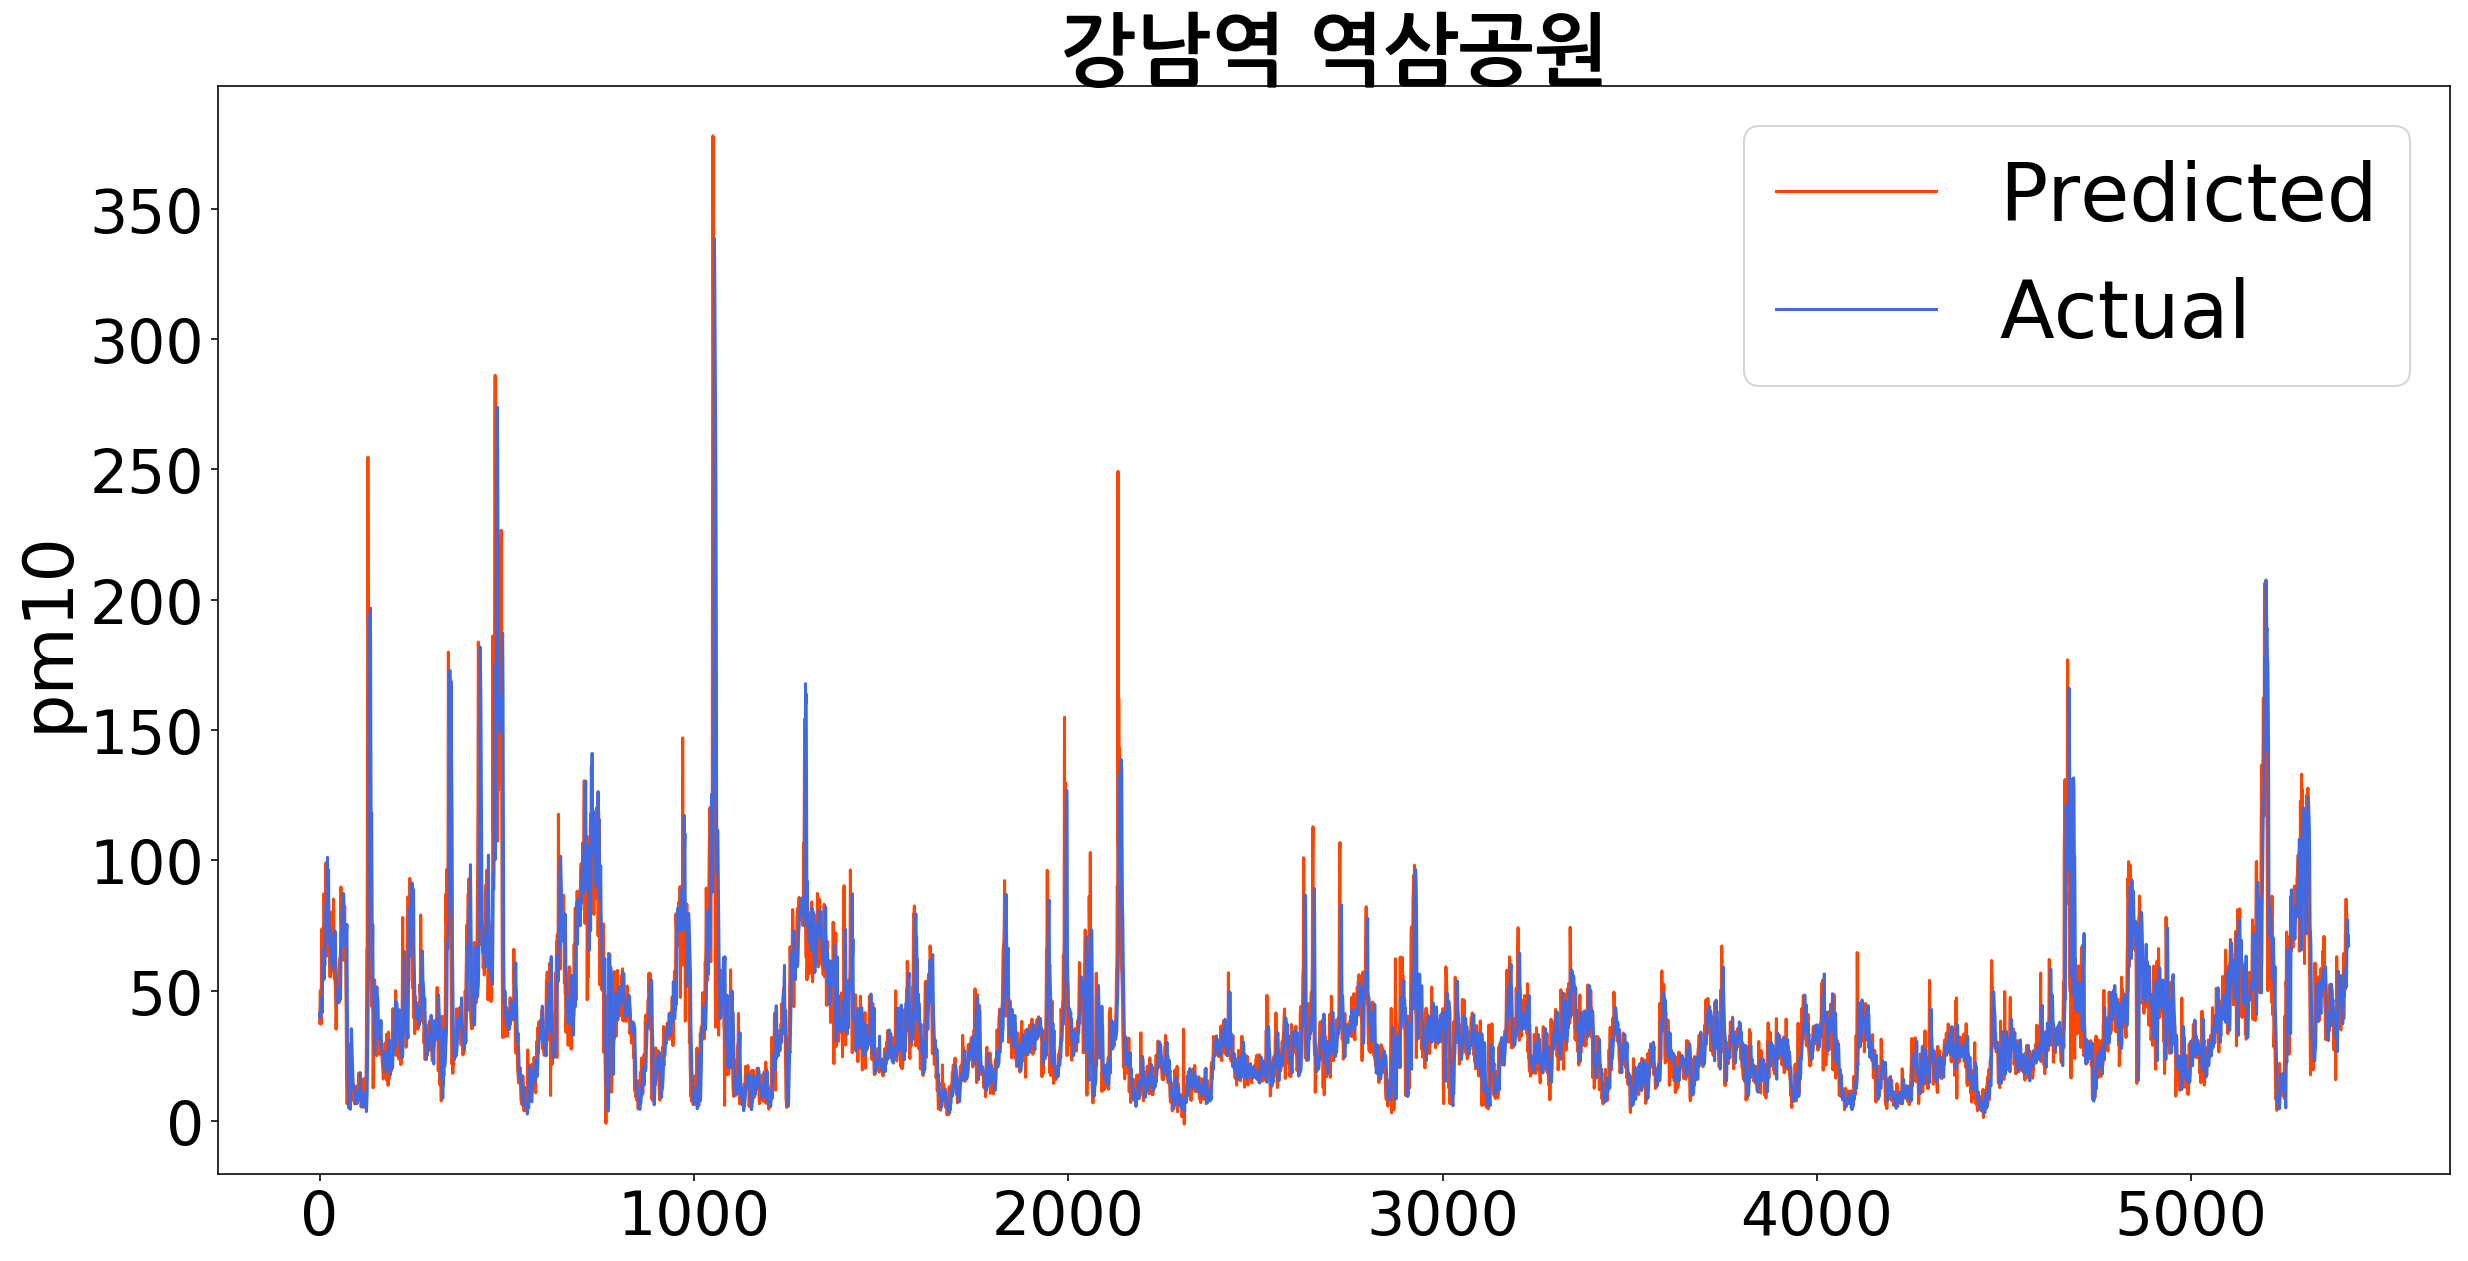

In [55]:
plt.figure(figsize=(20,10))
plt.plot(yhat_Gangnam, '#FF4500')
plt.plot(in_seqG, '#4169E1')
plt.legend(['Predicted', 'Actual'], loc='upper right', fontsize = 40)

plt.title('강남역 역삼공원',  fontproperties=fontprop)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('pm10', fontsize = 35)
plt.show()

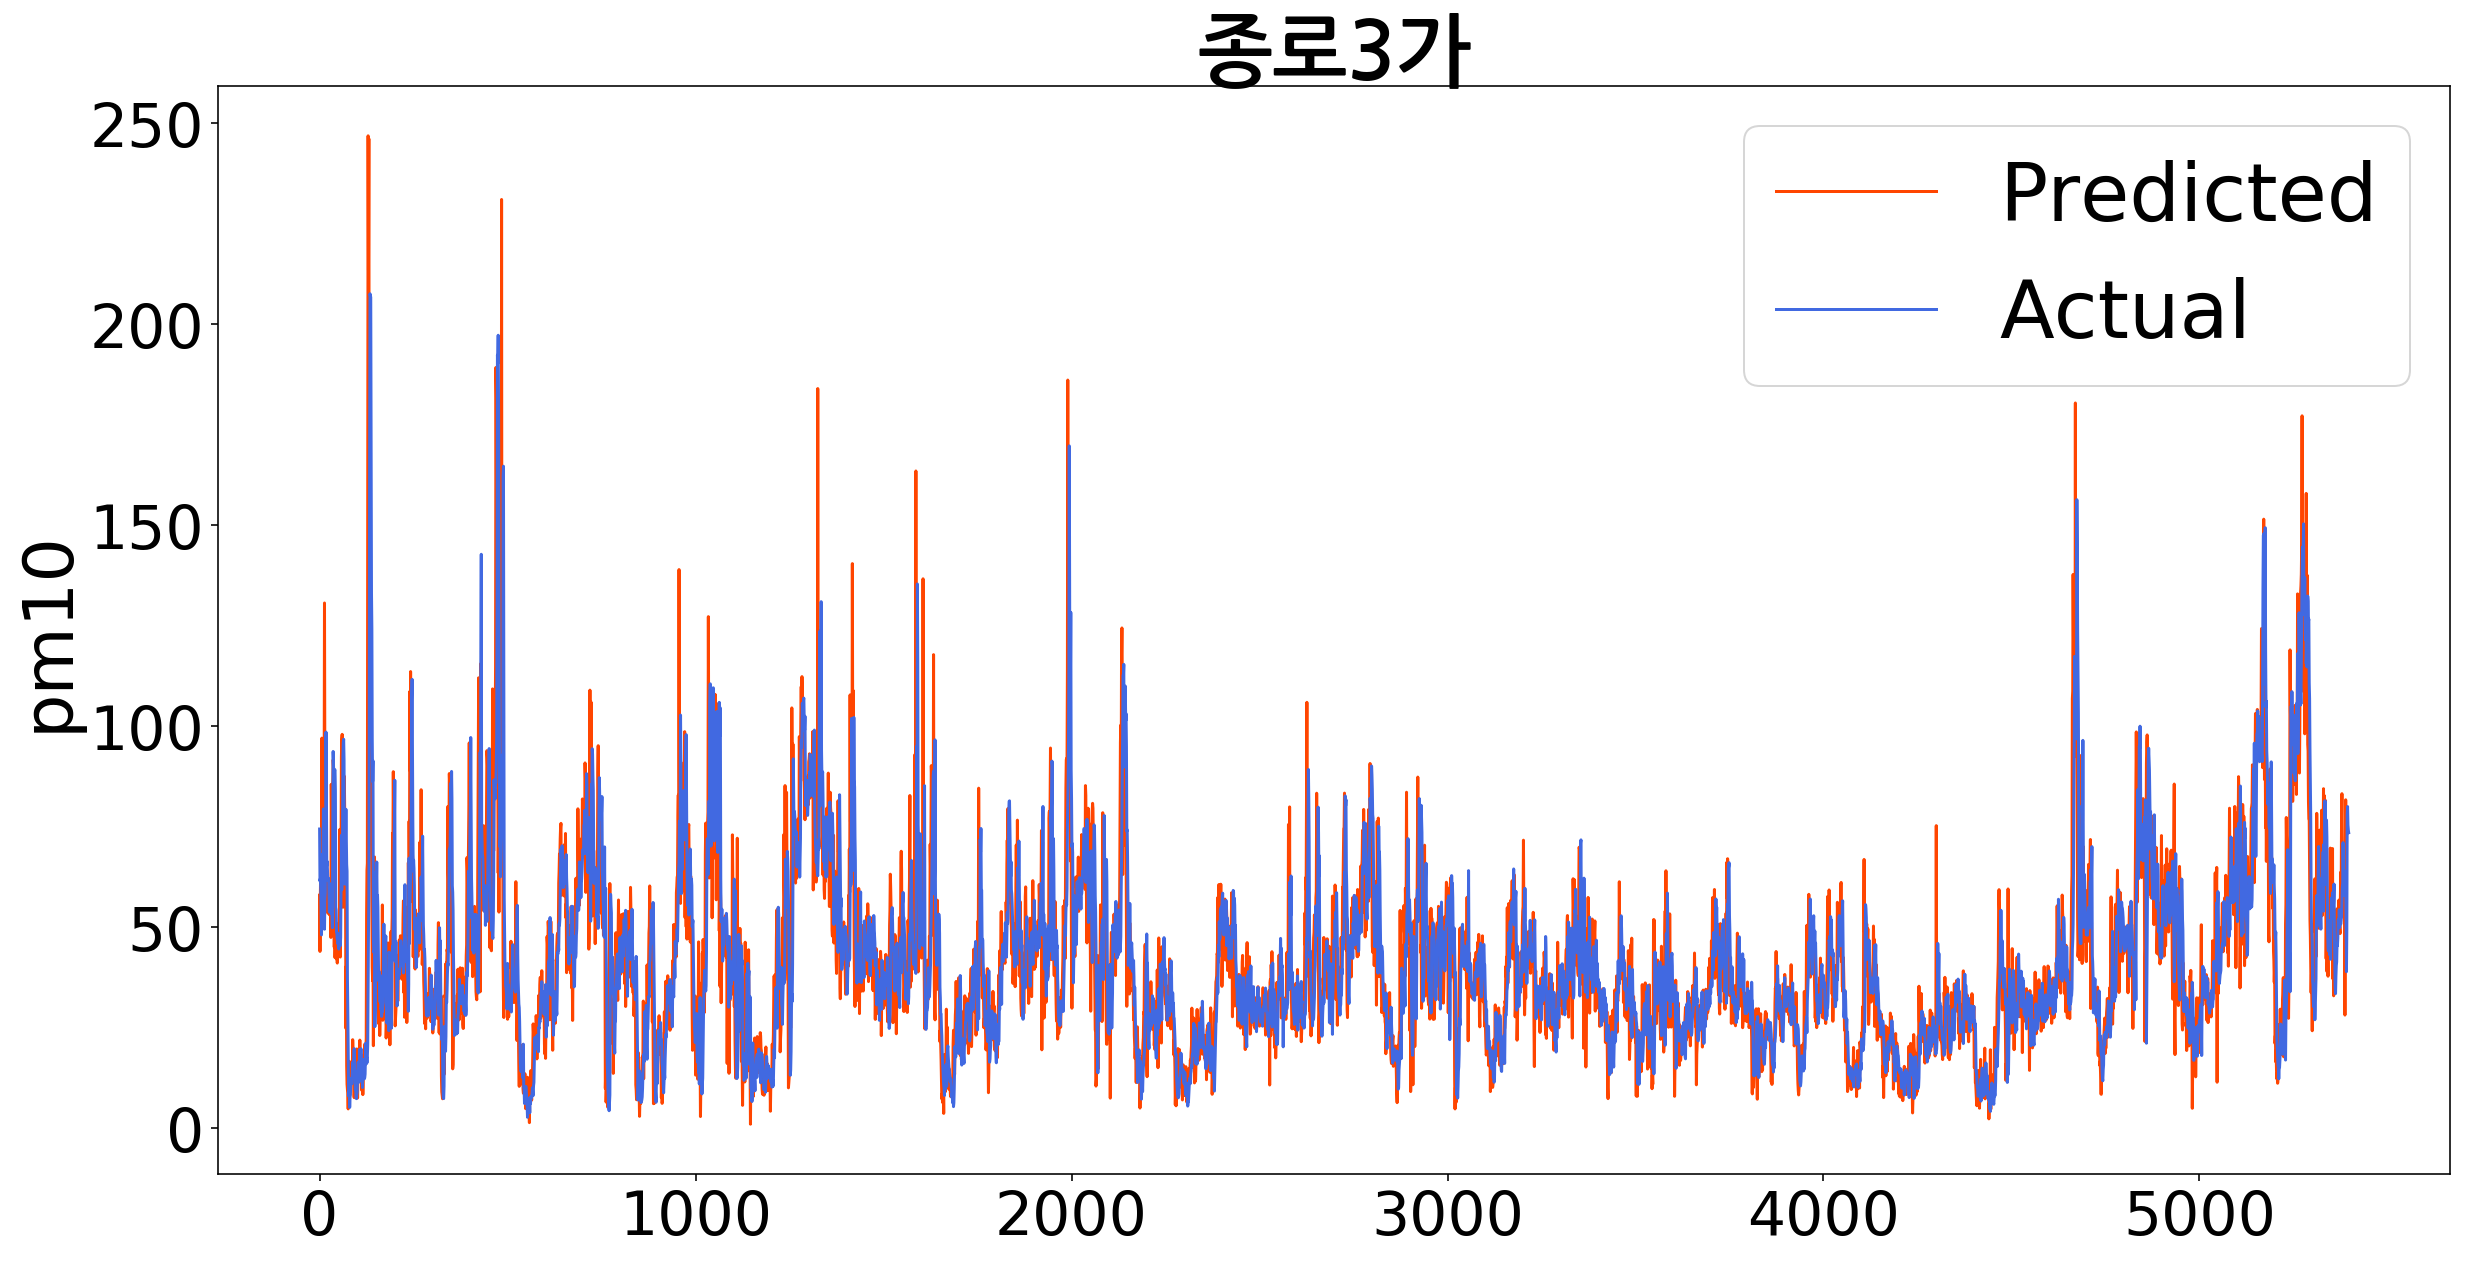

In [56]:
plt.figure(figsize=(20,10))
plt.plot(yhat_JL3avenue, '#FF4500')
plt.plot(in_seqJ3, '#4169E1')
plt.legend(['Predicted', 'Actual'], loc='upper right', fontsize = 40)

plt.title('종로3가',  fontproperties=fontprop)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('pm10', fontsize = 35)
plt.show()

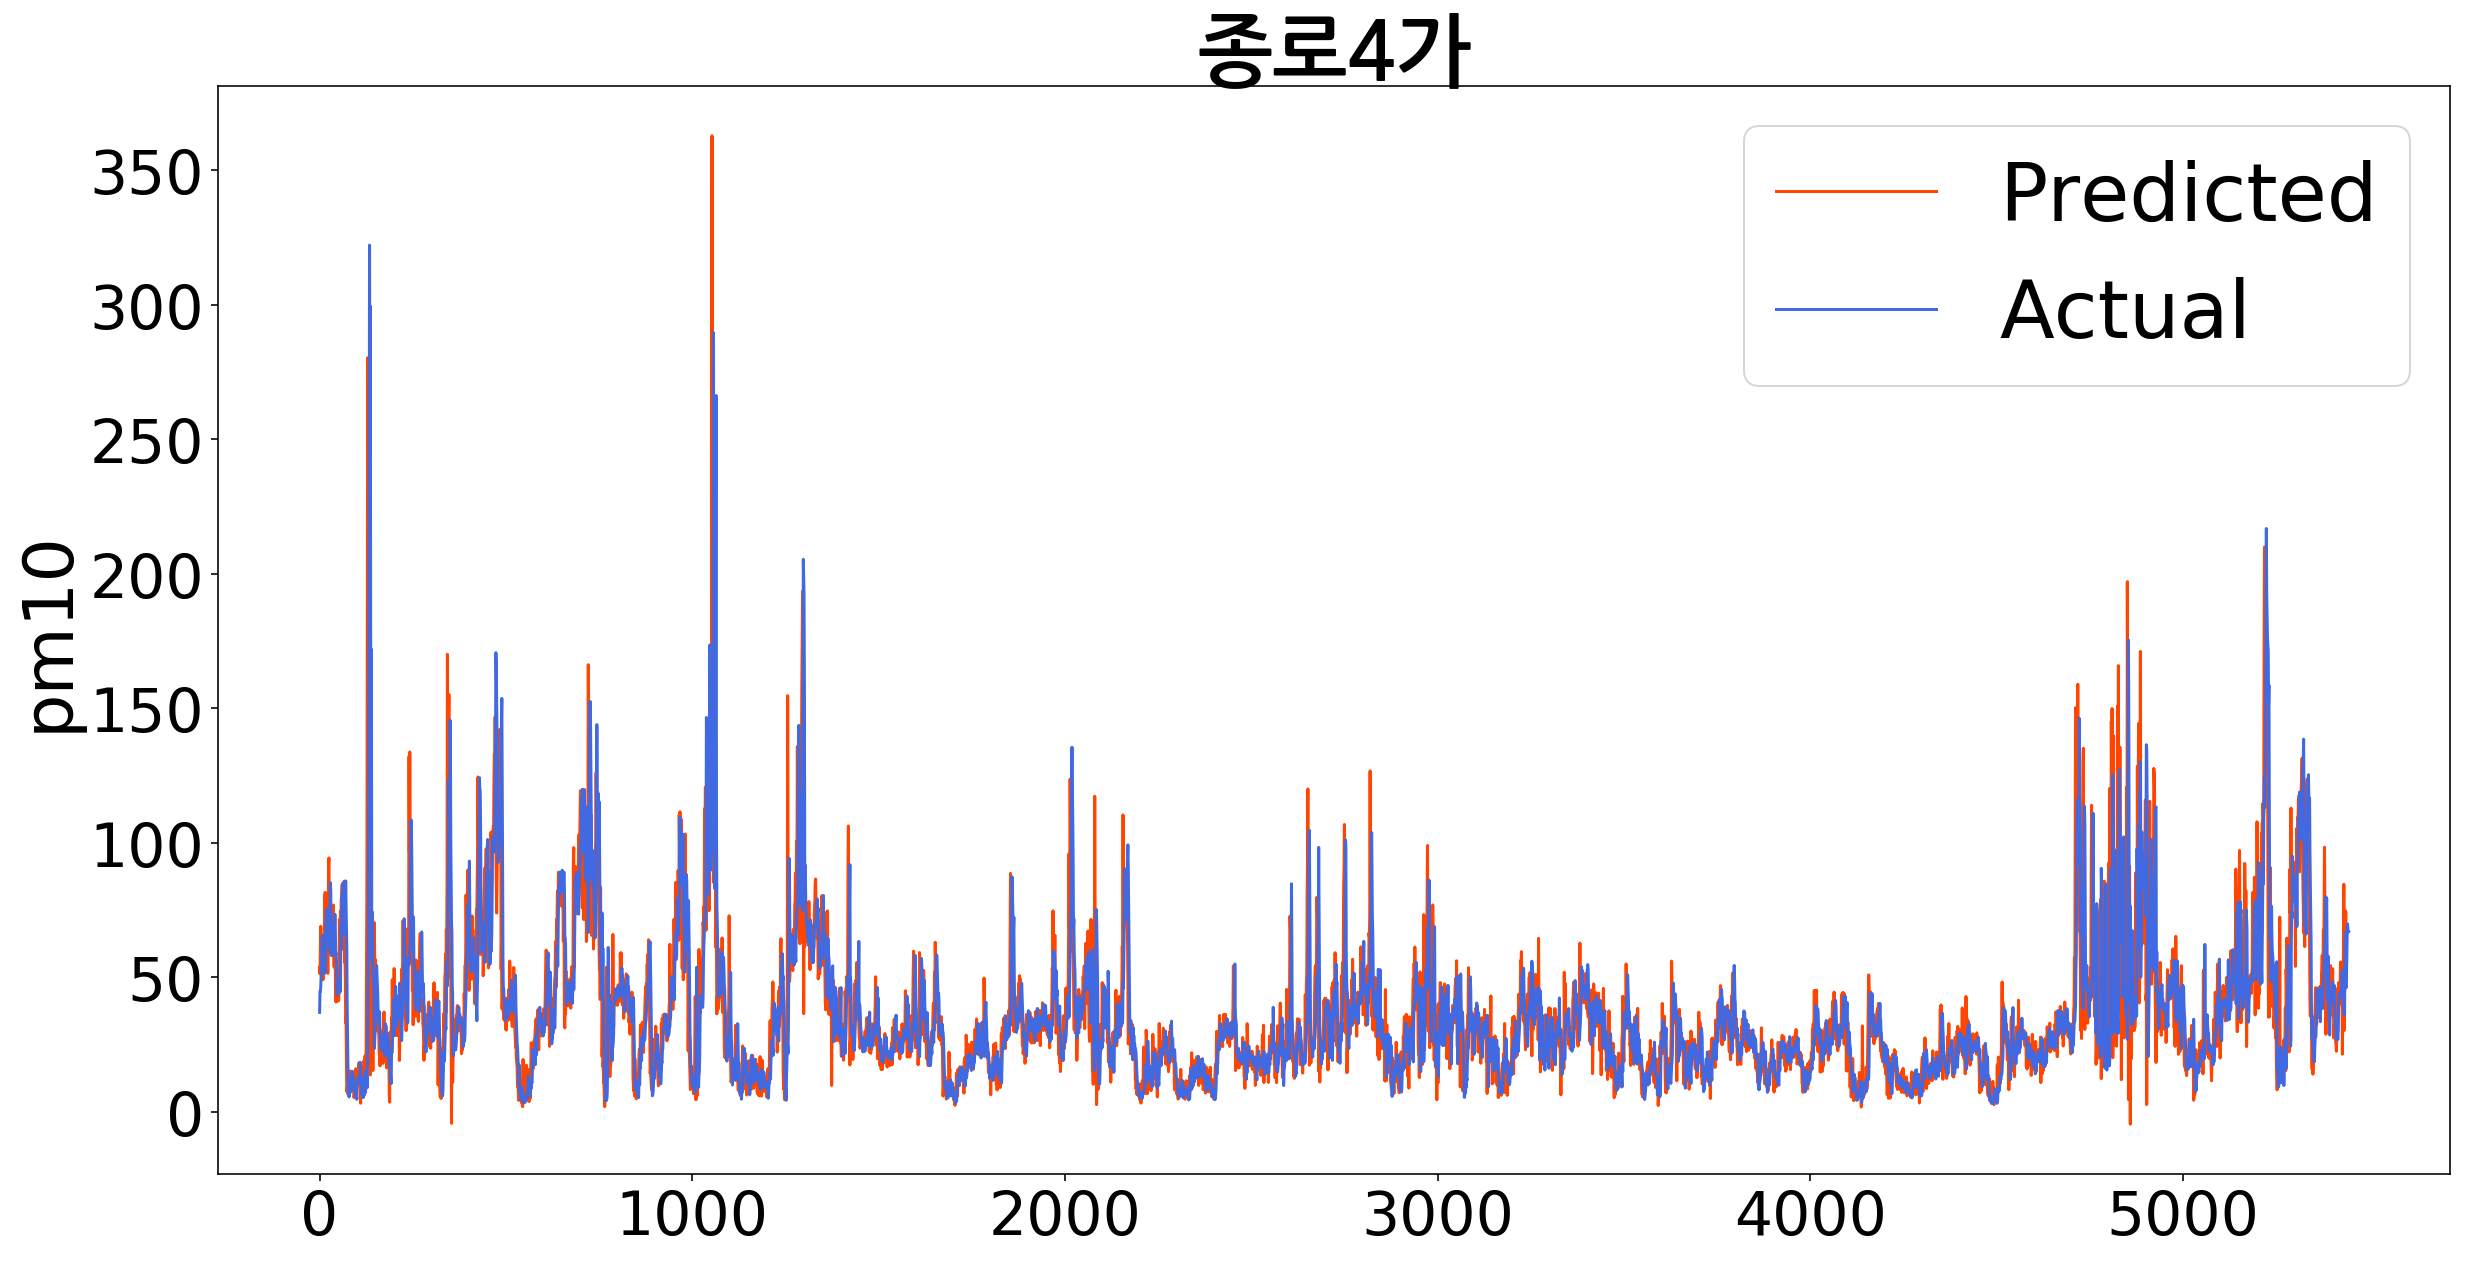

In [57]:
plt.figure(figsize=(20,10))
plt.plot(yhat_JL4avenue, '#FF4500')
plt.plot(in_seqJ4, '#4169E1')
plt.legend(['Predicted', 'Actual'], loc='upper right', fontsize = 40)

plt.title('종로4가',  fontproperties=fontprop)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('pm10', fontsize = 35)
plt.show()

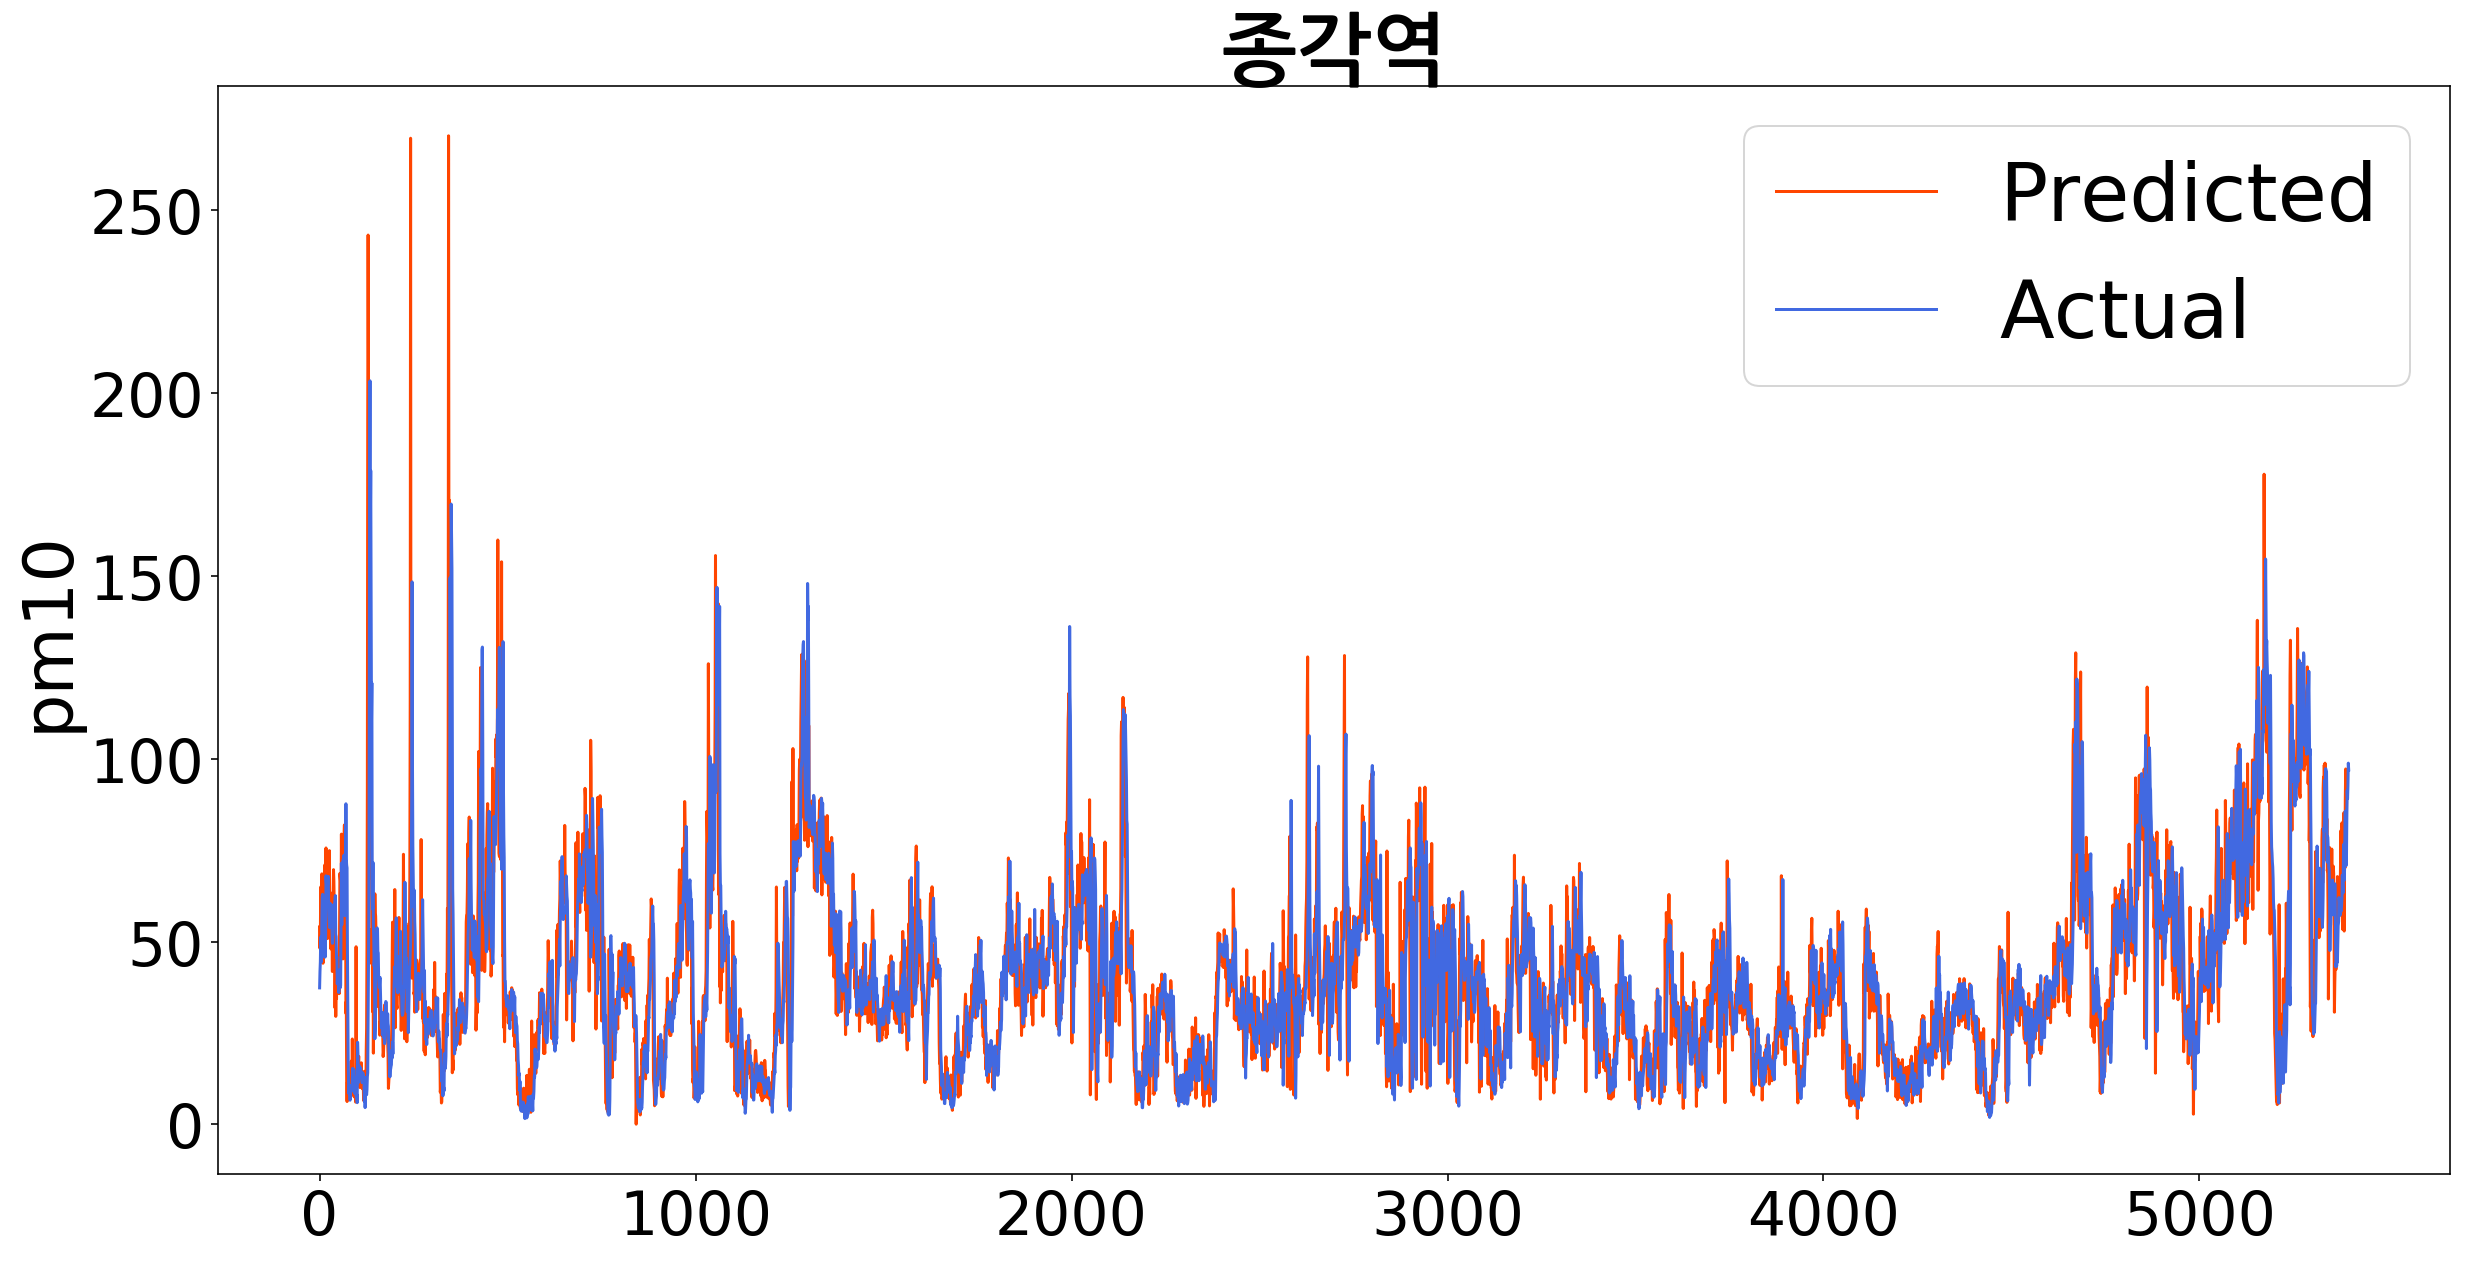

In [58]:
plt.figure(figsize=(20,10))
plt.plot(yhat_JLTower, '#FF4500')
plt.plot(in_seqJT, '#4169E1')
plt.legend(['Predicted', 'Actual'], loc='upper right', fontsize = 40)

plt.title('종각역',  fontproperties=fontprop)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('pm10', fontsize = 35)
plt.show()

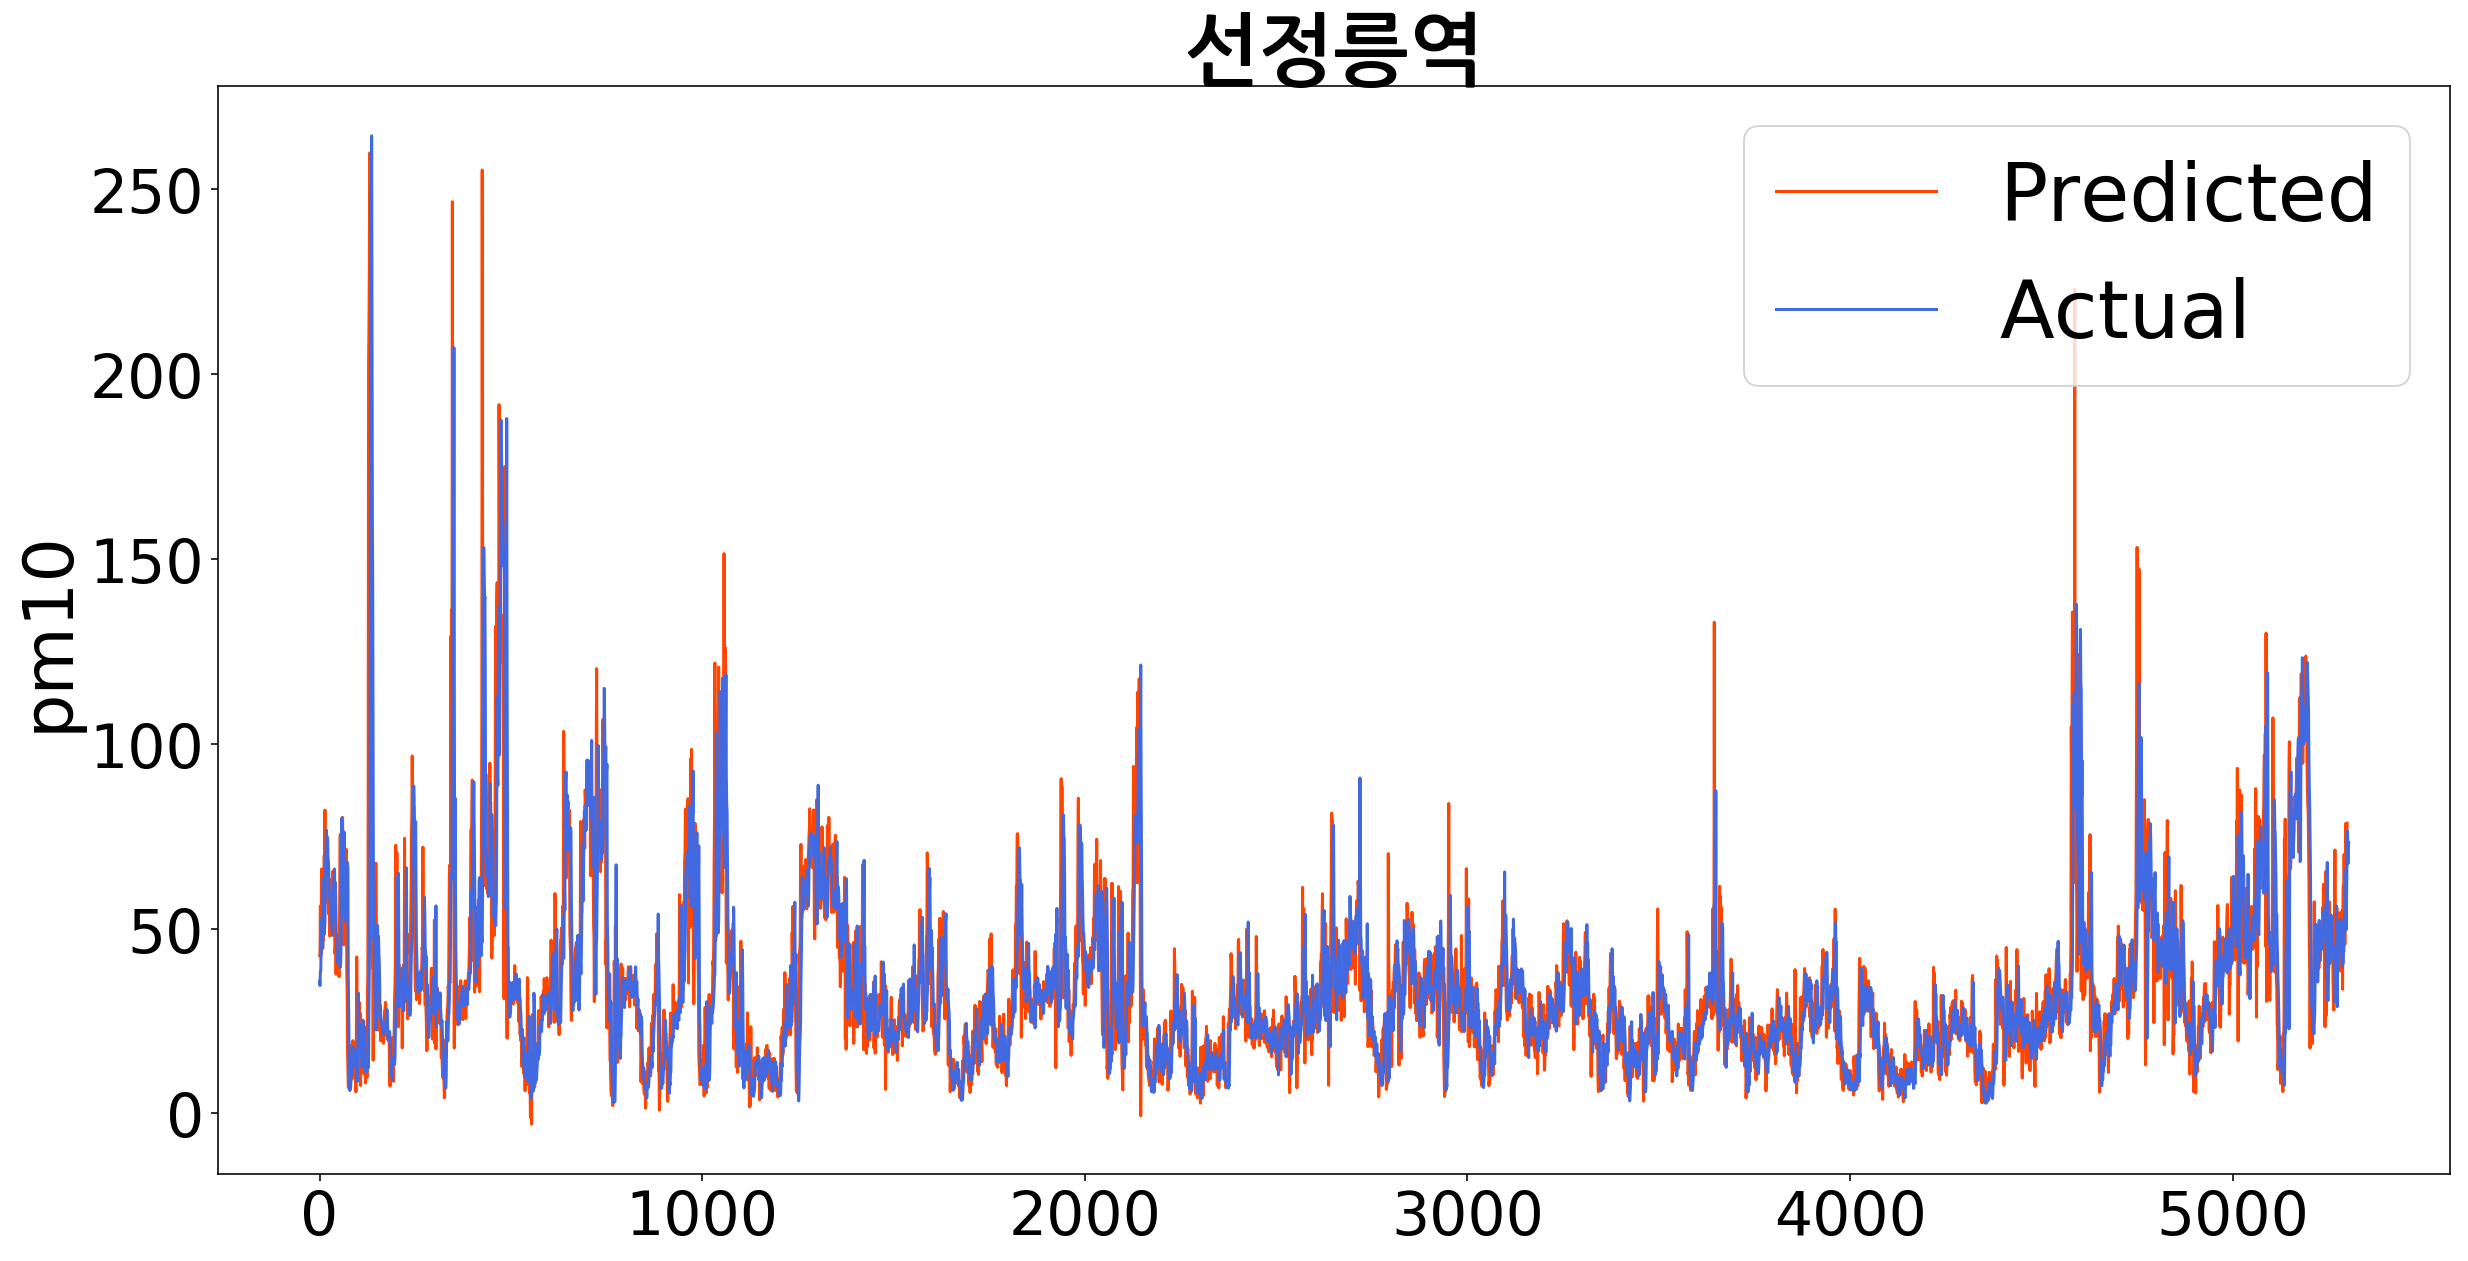

In [59]:
plt.figure(figsize=(20,10))
plt.plot(yhat_SJR, '#FF4500')
plt.plot(in_seqS, '#4169E1')
plt.legend(['Predicted', 'Actual'], loc='upper right', fontsize = 40)

plt.title('선정릉역',  fontproperties=fontprop)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('pm10', fontsize = 35)
plt.show()

In [101]:
from sklearn.metrics import mean_squared_error
from math import sqrt

ymA = sqrt(mean_squared_error(yhat_Angel, y_Angel))
ymG = sqrt(mean_squared_error(yhat_Gangnam, y_Gangnam))
ymJL3 = sqrt(mean_squared_error(yhat_JL3avenue, y_JL3avenue))
ymJL4 = sqrt(mean_squared_error(yhat_JL4avenue, y_JL4avenue))
ymJLT = sqrt(mean_squared_error(yhat_JLTower, y_JLTower))
ymSJR = sqrt(mean_squared_error(yhat_SJR[:-1], y_SJR[:-1]))

print(ymA)
print(ymG)
print(ymJL3)
print(ymJL4)
print(ymJLT)
print(ymSJR)

9.16524005597915
9.082831291817753
8.649808788902831
11.099066370601772
8.529347499236524
8.4183909255924


In [61]:
scores = model.evaluate(x_pm10, y_pm10, batch_size=1)
print(scores)

5467/5467 [==============================] - 9s 2ms/step
6.615752478297011


###  

In [ ]:
model2 = Sequential()
model2.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(n_steps,n_features)))
model2.add(LSTM(256, activation='relu'))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

hist2 = model2.fit(x_pm25, y_pm25, epochs=2**10, batch_size=2**10)

Epoch 1/1024
5467/5467 [==============================] - 5s 834us/step - loss: 480.0807
Epoch 2/1024
5467/5467 [==============================] - 2s 394us/step - loss: 127.8778
Epoch 3/1024
5467/5467 [==============================] - 2s 403us/step - loss: 87.1734
Epoch 4/1024
5467/5467 [==============================] - 2s 402us/step - loss: 63.8142
Epoch 5/1024
5467/5467 [==============================] - 2s 396us/step - loss: 51.5716
Epoch 6/1024
5467/5467 [==============================] - 2s 397us/step - loss: 41.8543
Epoch 7/1024
5467/5467 [==============================] - 2s 398us/step - loss: 37.0266
Epoch 8/1024
5467/5467 [==============================] - 2s 398us/step - loss: 32.6708
Epoch 9/1024
5467/5467 [==============================] - 2s 395us/step - loss: 30.7276
Epoch 10/1024
5467/5467 [==============================] - 2s 397us/step - loss: 27.8068
Epoch 11/1024
5467/5467 [==============================] - 2s 395us/step - loss: 25.2163
Epoch 12/1024
5467/5467 [===

In [ ]:
scores2 = model2.evaluate(x_pm25, y_pm25, batch_size=1)
print(scores2)

5467/5467 [==============================] - 7s 1ms/step
0.9720930891489216
